<a href="https://colab.research.google.com/github/o7s8r6/000AIGenIvaan/blob/main/PromptDataAanlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandasai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.7/798.7 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.5 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
googl

In [1]:
import pandas as pd
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI

In [5]:
!pwd
!ls

/content
drive  sample_data


In [12]:
df = pd.read_csv('drive/MyDrive/Data/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df = pd.read_csv(r'drive/MyDrive/Data/athlete_events.csv')
df.head()

In [15]:
# Loading the API token to OpenAI environment
llm = OpenAI(api_token='##############')
# Initializing an instance of PandasAI with OpenAI environment
pandas_ai = PandasAI(llm)

In [16]:
prompt ="Which athlete appeared in the most olympics years and how many"
pandas_ai.run(df,prompt=prompt) 

'The athlete who appeared in the most Olympic years is Ian Millar with 10 appearances.\n'

In [18]:
prompt ="Which are top three athletes appeared in the most olympics years and how many"
pandas_ai.run(df,prompt=prompt) 

Name
Ian Millar           10
Hubert Raudaschl      9
Afanasijs Kuzmins     9
Name: Year, dtype: int64

In [19]:
pandas_ai.run(df, prompt="Which athlete has participated in the most number of events and how many")

'The athlete who has participated in the most number of events is Ioannis Theofilakis with 33 events.\n'

In [23]:
pandas_ai.run(df,prompt="which country has won the highest number of medals and how many")

'The country with the highest number of medals is USA with 5637 medals.\n'

In [25]:
pandas_ai = PandasAI(llm,verbose=True)

In [ ]:
pandas_ai.run(df, 
prompt="generate a dataset with the total number of male and female participants in each year")

Running PandasAI with openai LLM...
Prompt ID: e558bbf1-92fd-41b2-a857-926fd333488a

                        Code generated:
                        ```
                        import pandas as pd
import matplotlib.pyplot as plt

# read the dataframe
df = pd.read_csv('data.csv')

# filter the dataframe to include only participants from IND
ind_df = df[df['NOC'] == 'IND']

# group by medal and count the number of occurrences
medal_counts = ind_df.groupby('Medal').size()

# plot the bar chart
medal_counts.plot(kind='bar')
plt.title('Total Medals Won by Participants from IND')
plt.xlabel('Medal Type')
plt.ylabel('Number of Medals')
plt.show()
                        ```
                    

Code running:
```
ind_df = df[df['NOC'] == 'IND']
medal_counts = ind_df.groupby('Medal').size()
medal_counts.plot(kind='bar')
plt.title('Total Medals Won by Participants from IND')
plt.xlabel('Medal Type')
plt.ylabel('Number of Medals')
plt.show()
```


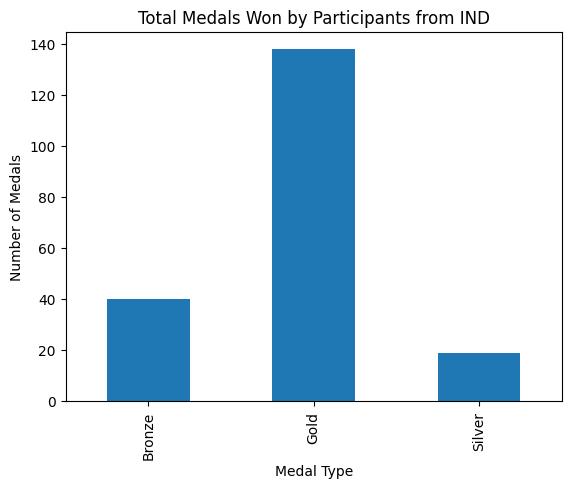

Answer: None


In [27]:
pandas_ai.run(df, 
prompt="plot a barplot with the total number of medals won by participants from IND")

In [28]:
pandas_ai.run(df, 
prompt="create a histogram for the number of athletes based on the age group. Take bin size of 10")

Running PandasAI with openai LLM...
Prompt ID: 73e54f34-f397-4f6d-9f1a-6d6502cbd24b

                        Code generated:
                        ```
                        import pandas as pd
import matplotlib.pyplot as plt

# read the dataframe
df = pd.read_csv('filename.csv')

# calculate age of athletes
df['Age'] = 2023 - df['Year']

# create histogram
plt.hist(df['Age'], bins=range(0, 100, 10))

# set labels and title
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.title('Histogram of Athlete Ages')

# show plot
plt.show()
                        ```
                    

Code running:
```
df['Age'] = 2023 - df['Year']
plt.hist(df['Age'], bins=range(0, 100, 10))
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.title('Histogram of Athlete Ages')
plt.show()
```
Answer: None


In [24]:
df.groupby(by='NOC')['Medal'].count().sort_values(ascending=False)

NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
       ... 
GAM       0
GBS       0
GEQ       0
PNG       0
LBA       0
Name: Medal, Length: 230, dtype: int64

In [22]:
df.groupby(by='Name')['Event'].nunique().sort_values(ascending=False)

Name
Ioannis Theofilakis          33
Alexandros Theofilakis       28
Gustaf Eric Carlberg         24
Gustaf Vilhelm Carlberg      22
Frangiskos D. Mavrommatis    22
                             ..
Isaac Korir                   1
Isaac Kiprono Songok          1
Isaac Jacob                   1
Isaac J. "Ike" Anderson       1
zzet nce                      1
Name: Event, Length: 134732, dtype: int64

In [17]:
df.groupby(by='Name')['Year'].nunique().sort_values(ascending=False)

Name
Ian Millar                         10
Hubert Raudaschl                    9
Afanasijs Kuzmins                   9
Lesley Allison Thompson-Willie      8
Nino Salukvadze (-Machavariani)     8
                                   ..
Imre Szentply                       1
Imre Szell                          1
Imre Szalay                         1
Imre Stori (Schwertz)               1
Karl Hohmann                        1
Name: Year, Length: 134732, dtype: int64